# Code for fitting photometry data

## Libraries we need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import special as sp
from scipy import optimize as op
from scipy import interpolate as ip
from IPython.display import Latex
plt.rcParams['figure.figsize'] = (16,8)

## Creating data lists

In [2]:
Baseline=np.array([8,12,20])
N=len(Baseline)
Mars_squared_visibility=[
    [[0.53702909,0.53986554,0.53986554],[0.49502340,0.49744273,0.49744273],[0.49501966,0.49742943,0.49742943]]
    ,[[0.21522365,0.21527814,0.21527814],[0.20380409,0.20631468,0.20631468],[0.21200288,0.21179992,0.21179992]]
    ,[[0.014119630,0.014119630,0.014470544],[0.012059569,0.012512654,0.012512654],[0.0097094168,0.0097094168,0.0096995073]]]
Sirius_squared_visibility=[[[0.70916327,0.71228920,0.71228920],[0.66915086,0.67190125,0.67190125],[0.64275124,0.64547513,0.64275124]]
    ,[[0.47154292,0.47300350,0.47154292],[0.51743026,0.51911452,0.51911452],[0.47199861,0.47358245,0.47358245]]
    ,[[0.17976266,0.18152939,0.18152939],[0.11521714,0.11235728,0.11235728],[0.14922414,0.14992092,0.14992092]]]

In [3]:
def ROOTED(SQUARED_VISIBILITY):
    #SQUARED_VISIBILITY = np.array()
    ROOTED_VISIBILITY=[]
    for i in SQUARED_VISIBILITY:
        ROOTED_VISIBILITY.append(abs(np.sqrt(i)))        
    return ROOTED_VISIBILITY

In [4]:
Mars_visibility= ROOTED(Mars_squared_visibility)
Sirius_visibility= ROOTED(Sirius_squared_visibility)

In [5]:
Mars_visibility

[array([[0.73282269, 0.73475543, 0.73475543],
        [0.70357899, 0.7052962 , 0.7052962 ],
        [0.70357634, 0.70528677, 0.70528677]]),
 array([[0.46392203, 0.46398075, 0.46398075],
        [0.45144666, 0.45421876, 0.45421876],
        [0.4604377 , 0.46021725, 0.46021725]]),
 array([[0.11882605, 0.11882605, 0.12029357],
        [0.10981607, 0.11185997, 0.11185997],
        [0.09853637, 0.09853637, 0.09848608]])]

In [6]:
Sirius_visibility

[array([[0.84211832, 0.84397227, 0.84397227],
        [0.81801642, 0.81969583, 0.81969583],
        [0.80171768, 0.80341467, 0.80171768]]),
 array([[0.68668983, 0.6877525 , 0.68668983],
        [0.71932625, 0.72049602, 0.72049602],
        [0.68702155, 0.68817327, 0.68817327]]),
 array([[0.42398427, 0.42606266, 0.42606266],
        [0.3394365 , 0.33519737, 0.33519737],
        [0.38629541, 0.38719623, 0.38719623]])]

## Defining Functions

In [7]:
#Mean and standard deviations:
def std_mean_visibility(Lin):
    Lout = []
    Lavg = []
    for i in Lin:
        Lavg.append(np.mean(i))
        Lout.append(np.std(i))
    expression = print('\n The average visibility:' ,Lavg ,'\n','The standard deviation for each visibility:', Lout)
    return Lavg, Lout, expression

In [8]:
#Calibrated standard deviation:
def CALIB_STD(STD_OBJECT,STD_REFERENCE,V_OBJECT,V_REFERENCE):
    CALIBRATED_STANDARD_DEVIATION = []
    for i in range(len(STD_OBJECT)):
        CALIBRATED_STANDARD_DEVIATION.append((V_OBJECT[i]/V_REFERENCE[i])*np.sqrt(((STD_OBJECT[i]/V_OBJECT[i])**2)+((STD_REFERENCE[i]/V_REFERENCE[i])**2)))
    return CALIBRATED_STANDARD_DEVIATION

#CHISQUARE for the plot:
def CHISQUARE(N_Baseline, Calibrated_Visibility, Fitted_Visibility, Standard_Deviation):
    CHI=[]
    c1=0
    c2=0
    for i in Calibrated_Visibility:
        c1+=1
        c2=0
        c3=0
        for j in Fitted_Visibility:
            c2+=1
            c3=0
            for k in Standard_Deviation:
                c3+=1
                if ((c1==c2) and (c1==c3)):
                    CHI.append((1/(N_Baseline-1))*(((i-j)**2)/k))
    CHISUM = np.sum(CHI)    
    return CHISUM

## Results

### Calculations

In [9]:
Mars_Mean,Mars_Standard_deviation,l= std_mean_visibility(Mars_visibility)
Sirius_Mean,Sirius_Standard_deviation,l= std_mean_visibility(Sirius_visibility)


 The average visibility: [0.7145172018133503, 0.45918221422791944, 0.10967116826893893] 
 The standard deviation for each visibility: [0.013880701292633612, 0.004488840863810076, 0.008583806166489417]

 The average visibility: [0.8215912195579255, 0.6983131719098874, 0.3829587449727887] 
 The standard deviation for each visibility: [0.016876846427008176, 0.01542211771871696, 0.03636621881759011]


### Plot of data

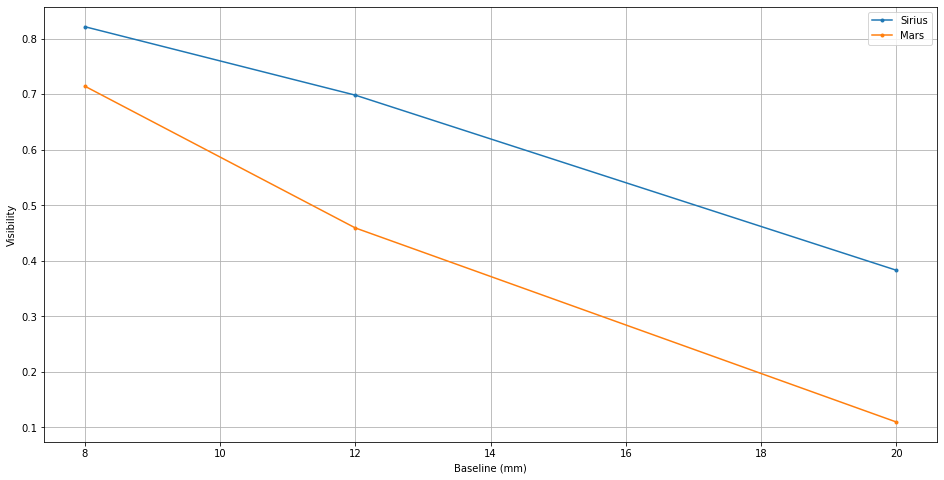

In [10]:
Sirius_plot= plt.plot(Baseline,Sirius_Mean,'.-',label='Sirius')
Mars_plot= plt.plot(Baseline,Mars_Mean,'.-',label='Mars')
plt.xlabel('Baseline (mm)')
plt.ylabel('Visibility')
plt.legend()
plt.grid()

In [11]:
Calibrated_Visibility=[]
cs=0
cm=0
for i in Sirius_Mean:
    cs+=1
    cm=0
    for j in Mars_Mean:
        cm+=1
        if cs==cm:
            Calibrated_Visibility.append(j/i)
print(Calibrated_Visibility)

[0.869674827096876, 0.6575591478133737, 0.28637854523137124]


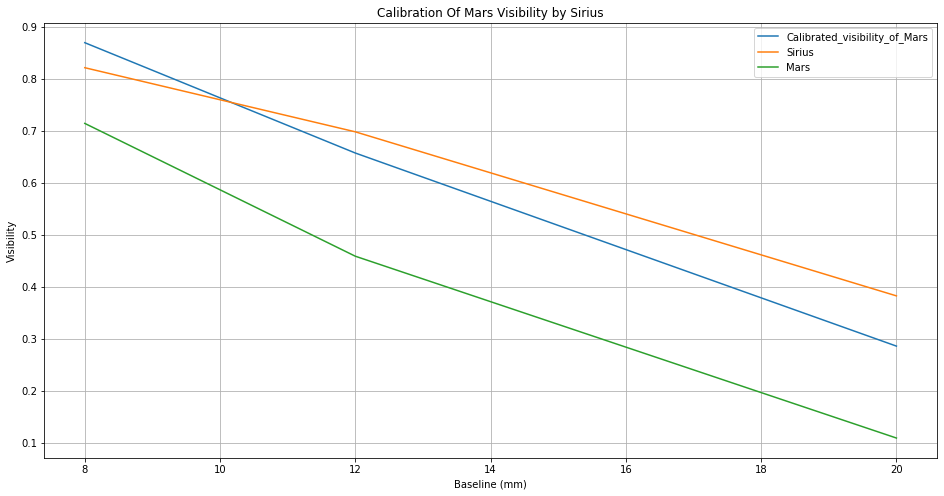

In [12]:
Calibrated_plot= plt.plot(Baseline,Calibrated_Visibility,label='Calibrated_visibility_of_Mars')
Sirius_plot= plt.plot(Baseline,Sirius_Mean,label='Sirius')
Mars_plot= plt.plot(Baseline,Mars_Mean,label='Mars')
plt.legend()
plt.grid()
plt.xlabel('Baseline (mm)')
plt.ylabel('Visibility')
plt.title('Calibration Of Mars Visibility by Sirius')
plt.draw()
plt.savefig('123.pdf')

### Fitting function

In [13]:
#B0 parameter
def fit_model_function(B,B0):
    fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)
    FFResult = [abs(number) for number in fit_result1]
    return FFResult

In [14]:
BNew = np.linspace(0,40,401)

### Speculation of the Guess prameter for the optimization

<ipython-input-13-397a439bfcda>:3: RuntimeWarning: invalid value encountered in true_divide
  fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)
<ipython-input-13-397a439bfcda>:3: RuntimeWarning: invalid value encountered in true_divide
  fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)
<ipython-input-13-397a439bfcda>:3: RuntimeWarning: invalid value encountered in true_divide
  fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)
<ipython-input-13-397a439bfcda>:3: RuntimeWarning: invalid value encountered in true_divide
  fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)
<ipython-input-13-397a439bfcda>:3: RuntimeWarning: invalid value encountered in true_divide
  fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)


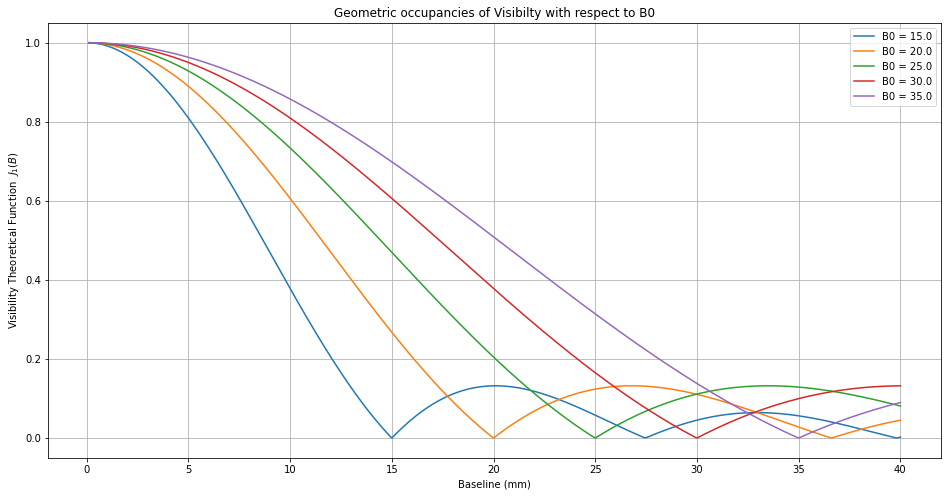

In [15]:
B0_test = np.linspace(15,35,5)
for i in B0_test:
    plt.plot(BNew,fit_model_function(BNew,i),label=f"B0 = {i}");
plt.legend()
plt.title('Geometric occupancies of Visibilty with respect to B0')
plt.xlabel('Baseline (mm)')
plt.ylabel(r'Visibility Theoretical Function  $J_{1}(B)$')
plt.grid()
plt.draw()
plt.savefig('Guessing_the_guess.pdf')

# Calculations:

In [16]:
B0, Y0 = op.curve_fit(fit_model_function, Baseline, Calibrated_Visibility, p0=25)
B0, Y0

(array([27.02728182]), array([[0.27422126]]))

In [17]:
FY= fit_model_function(np.array(Baseline),B0)
FY

[0.8475189467747707, 0.6791529359784151, 0.2803456530475009]

In [18]:
FY1= fit_model_function(BNew,B0)

<ipython-input-13-397a439bfcda>:3: RuntimeWarning: invalid value encountered in true_divide
  fit_result1= (2*sp.jv(1,B*np.pi*1.22/B0) )/(1.22*np.pi*B/B0)


In [19]:
C0=.07073068*np.ones(120) 

In [20]:
CALIBRATED_MARS_STANDARD_DEVIATION = CALIB_STD(Mars_Standard_deviation,Sirius_Standard_deviation,Mars_Mean,Sirius_Mean)
CHISQUARED_DATA= CHISQUARE(N,Calibrated_Visibility,FY,CALIBRATED_MARS_STANDARD_DEVIATION)

In [21]:
CHISQUARED_DATA

0.02517910955519508

In [22]:
Calibrated_Visibility,FY

([0.869674827096876, 0.6575591478133737, 0.28637854523137124],
 [0.8475189467747707, 0.6791529359784151, 0.2803456530475009])

In [23]:
CALIBRATED_MARS_STANDARD_DEVIATION

[0.02458821396706298, 0.01588116240937992, 0.03524155100242703]

# Plotting the result of our fit

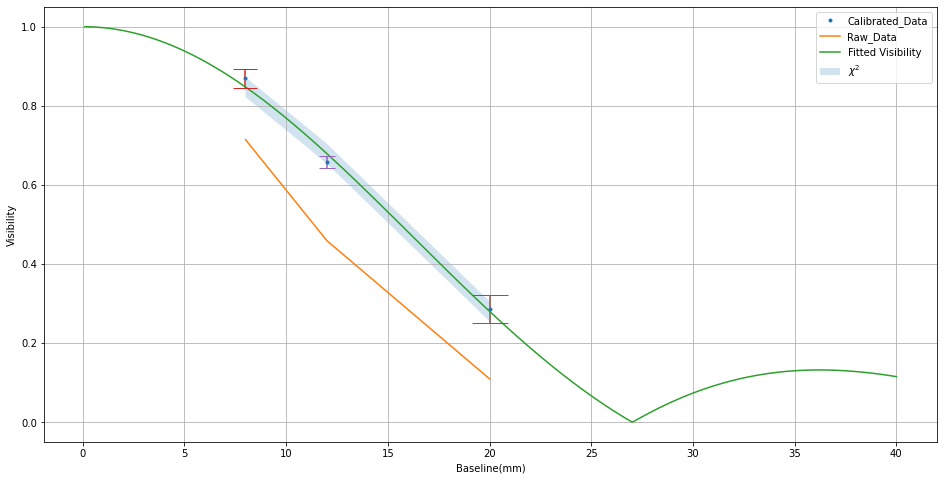

In [24]:
plt.plot(Baseline,Calibrated_Visibility,'.',label='Calibrated_Data')
plt.plot(Baseline,Mars_Mean,label='Raw_Data')
plt.plot(BNew,FY1,label='Fitted Visibility')
plt.fill_between(Baseline, FY-CHISQUARED_DATA*np.ones(3), FY +CHISQUARED_DATA*np.ones(3), alpha=0.2, label=r'$\chi^{2}$')
plt.errorbar(Baseline[0],Calibrated_Visibility[0], yerr=CALIBRATED_MARS_STANDARD_DEVIATION[0], capsize= 500*CALIBRATED_MARS_STANDARD_DEVIATION[0])
plt.errorbar(Baseline[1],Calibrated_Visibility[1], yerr=CALIBRATED_MARS_STANDARD_DEVIATION[1], capsize= 500*CALIBRATED_MARS_STANDARD_DEVIATION[1])
plt.errorbar(Baseline[2],Calibrated_Visibility[2], yerr=CALIBRATED_MARS_STANDARD_DEVIATION[2], capsize= 500*CALIBRATED_MARS_STANDARD_DEVIATION[2])
plt.legend()
plt.grid()
plt.xlabel('Baseline(mm)')
plt.ylabel('Visibility')
plt.draw()
plt.savefig('fitted_plot.pdf')

## Calculation of Thetha

In [25]:
llambda = 1.2*10e-6 # micro m
index_min=np.nanargmin(FY1)
B_min = BNew[index_min]
Theta =1.22*llambda/(B_min*10e-3) # mm
Theta

5.422222222222222e-05

### Theta in arcseconds

In [26]:
Theta_arcsec = Theta*(3600*180)/np.pi
Theta_arcsec

11.18413616095367